importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IMG

loading data and 
splitting data into testing and training data

In [121]:
X_train = np.loadtxt('Datasource/input.csv',delimiter=',')
y_train = np.loadtxt('Datasource/labels.csv',delimiter=',')

X_test = np.loadtxt('Datasource/input_test.csv',delimiter=',')
y_test = np.loadtxt('Datasource/labels_test.csv',delimiter=',')

In [122]:
#check for the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [123]:
X_train = X_train.reshape(len(X_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

X_train=X_train/255
X_test=X_test/255

In [124]:
#trainig data scaled to range 0 to 1
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

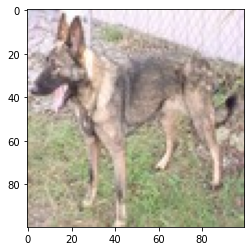

In [125]:
#checking data present in the training data,, displaying random data from the traing data
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

creating neural network layers 

In [126]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())


model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [127]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

training the model

In [128]:
model.fit(X_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 16s 403ms/step - loss: 0.6828 - accuracy: 0.5445
Epoch 2/5
32/32 [==============================] - 14s 429ms/step - loss: 0.6251 - accuracy: 0.6635
Epoch 3/5
32/32 [==============================] - 14s 429ms/step - loss: 0.5458 - accuracy: 0.7285
Epoch 4/5
32/32 [==============================] - 14s 429ms/step - loss: 0.4539 - accuracy: 0.7890
Epoch 5/5
32/32 [==============================] - 14s 434ms/step - loss: 0.3794 - accuracy: 0.8245


checking the model performance(accuracy)

In [130]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 1s 58ms/step - loss: 0.6282 - accuracy: 0.6975


[0.6281595826148987, 0.6974999904632568]

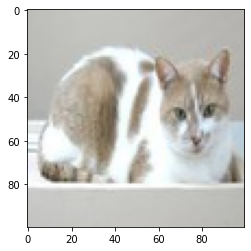

1/1 [==============================] - 0s 17ms/step
Dog


In [133]:
#making prediction
imageIndex = random.randint(0,len(y_test))
plt.imshow(X_test[imageIndex,:])
plt.show()
prediction = model.predict(X_test[imageIndex,:].reshape(1,100,100,3))
prediction = np.round(prediction)
prediction
if (prediction == 1):
    prediction = 'Dog'
    print(prediction)
else:
    prediction = 'Cat'
    print(prediction)